# 0. Install and import libraries

### Install libraries

### Import libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sbn

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy import stats

In [6]:
from sklearn.preprocessing import MinMaxScaler

# 1. Research Goal

## Hypotheses

($H_0$): The alcohol % does not influence the quality of a wine

($H_a$): A higher alcohol % equals a higher average quality for a wine

Significance level ($\alpha$): 0,05 (5%)

# 2. Retrieve Data

### White Wine

In [7]:
dfwhitewine = pd.read_excel(r"C:\Users\Administrator\BI\WineProject\data\winequality-white.xlsx", header=1)

In [8]:
dfwhitewine.shape

(4898, 12)

In [9]:
dfwhitewine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='str')

In [10]:
dfwhitewine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

In [11]:
dfwhitewine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
dfwhitewine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3912,6.5,0.33,0.30,3.8,0.036,34.0,88.0,0.99028,3.25,0.63,12.5,7
4252,6.7,0.11,0.26,14.8,0.053,44.0,95.0,0.99676,3.20,0.35,9.8,6
4277,7.2,0.22,0.35,5.5,0.054,37.0,183.0,0.99474,3.08,0.50,10.3,5
4779,6.0,0.59,0.00,0.8,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,4
3328,6.4,0.24,0.29,1.0,0.038,18.0,122.0,0.99060,3.30,0.42,11.5,5


In [13]:
dfwhitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [14]:
# Check rows for missing data
dfwhitewine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Check for number of duplicates
dfwhitewine.duplicated().sum()

np.int64(937)

### Red Wine

In [16]:
dfredwine = pd.read_excel(r"C:\Users\Administrator\BI\WineProject\data\winequality-red.xlsx", header=1)

In [17]:
dfredwine.shape

(1599, 12)

In [18]:
dfredwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='str')

In [19]:
dfredwine.info()

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
dfredwine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [21]:
dfredwine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
877,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,3.41,0.57,11.8,6
1195,6.2,0.430,0.22,1.8,0.078,21.0,56.0,0.99633,3.52,0.60,9.5,6
1198,7.7,0.260,0.26,2.0,0.052,19.0,77.0,0.99510,3.15,0.79,10.9,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5


In [22]:
dfredwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
# Check for rows with missing data
dfredwine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
# Check for duplicates
dfredwine.duplicated().sum()

np.int64(240)

# 3. Data Preparation

### Cleaning, whitewine

In [25]:
# remove duplicates
dfwhitewine = dfwhitewine.drop_duplicates()

### Cleaning, redwine

In [26]:
# remove duplicates
dfredwine = dfredwine.drop_duplicates()

### Aggregate red and white wine

In [27]:
# Add 'type' column to redwine
dfredwine['type'] = 'red'

In [28]:
# Add 'type' column to whitewine
dfwhitewine['type'] = 'white'

In [29]:
# Check the new columns
dfredwine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [30]:
dfwhitewine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


In [31]:
# Aggregate the two dataframes
dfwine = pd.concat([dfredwine, dfwhitewine])

In [32]:
# Check the new aggregated dataframe
dfwine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
57,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.99720,3.30,0.36,8.9,6,white
473,7.0,0.17,0.31,4.8,0.034,34.0,132.0,0.99440,3.36,0.48,9.6,7,white
2701,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.8,5,white
1239,10.3,0.25,0.48,2.2,0.042,28.0,164.0,0.99800,3.19,0.59,9.7,5,white
684,9.8,0.98,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5,red


### Choosing the dependent variable

We will choose the dependent variable as 'quality', and then determine how the other independent variables affect the quality of af wine.

# 4. Data Exploration

### Descriptive statstics and analysis

In [33]:
# Comparison of mean values for all wines
pd.DataFrame({
    'Red Wine': dfredwine.mean(numeric_only=True),
    'White Wine': dfwhitewine.mean(numeric_only=True),
    'All Wine': dfwine.mean(numeric_only=True)
})

,Red Wine,White Wine,All Wine
fixed acidity,8.310596,6.839346,7.215179
volatile acidity,0.529478,0.280538,0.344130
citric acid,0.272333,0.334332,0.318494
residual sugar,2.523400,5.914819,5.048477
chlorides,0.088124,0.045905,0.056690
free sulfur dioxide,15.893304,34.889169,30.036654
total sulfur dioxide,46.825975,137.193512,114.109023
density,0.996709,0.993790,0.994535
pH,3.309787,3.195458,3.224664
sulphates,0.658705,0.490351,0.533357


### Red wine

In [34]:
# Check the describtive stats
dfredwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

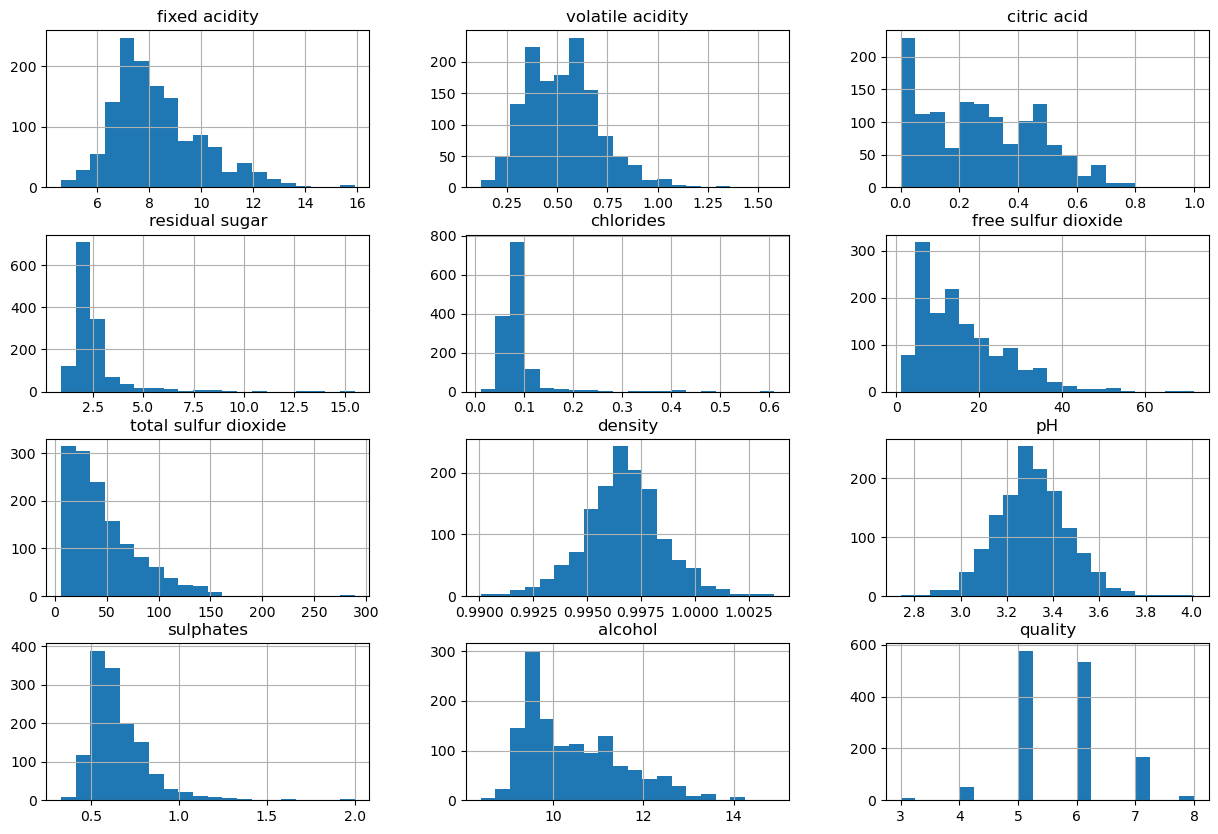

In [35]:
# Histograms of all the columns, to check for normal distributions
dfredwine.hist(figsize=(15, 10), bins=20)

From the histograms, we can se a normal distrubution in the 'pH' and 'density' attributes.

### White wine

In [36]:
dfwhitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

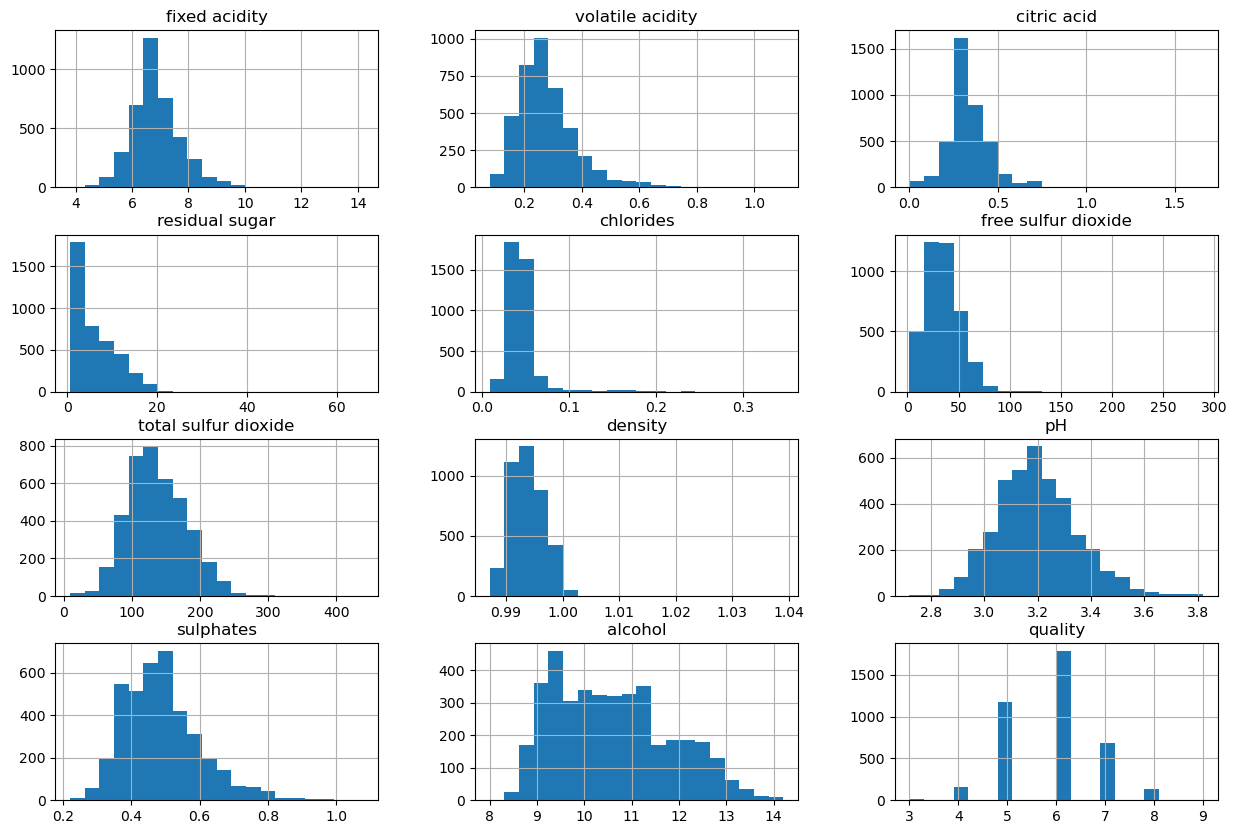

In [37]:
# Histograms of all the columns, to check for normal distributions
dfwhitewine.hist(figsize=(15, 10), bins=20)

### All wine

In [38]:
dfwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

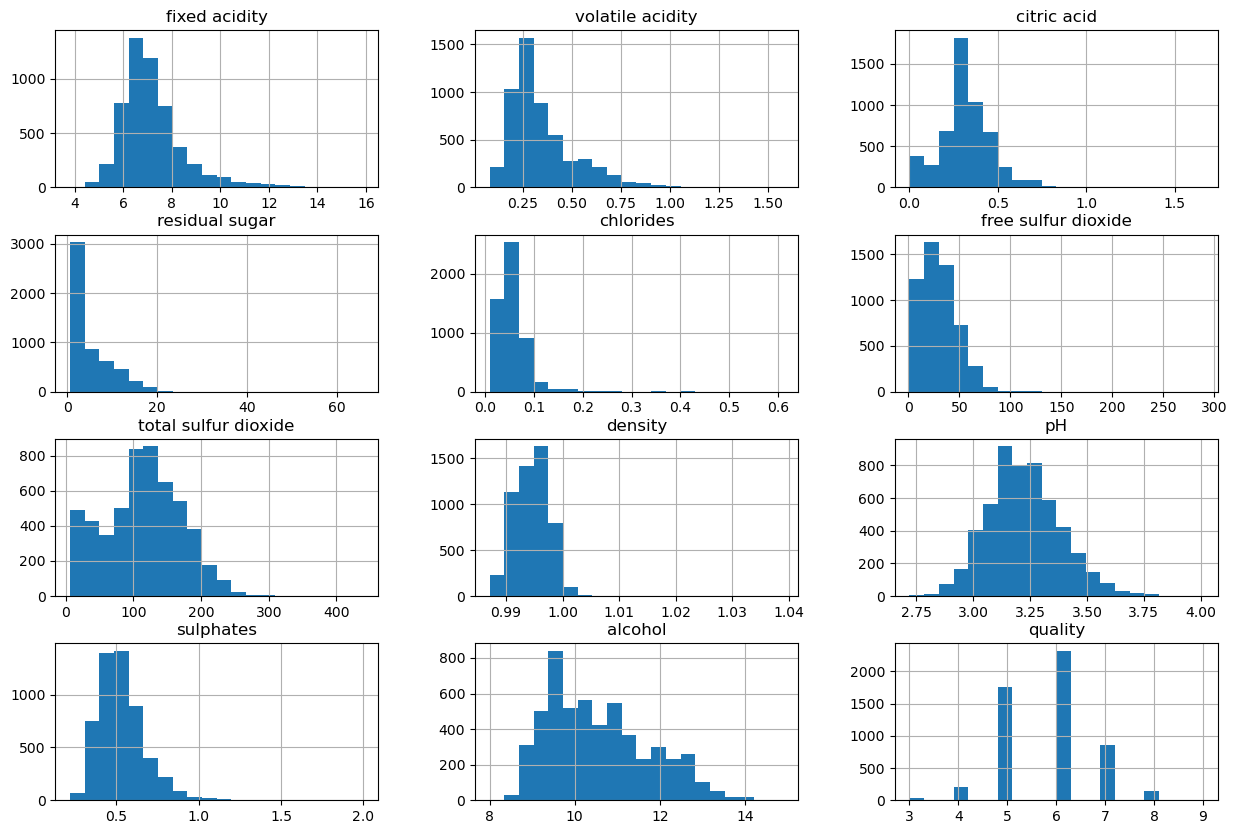

In [39]:
# Histograms of all the columns, to check for normal distributions
dfwine.hist(figsize=(15, 10), bins=20)

### Outliers

#### Indentifying outliers

In [40]:
dfskewed = pd.DataFrame({
    'Red Wine': dfredwine.skew(numeric_only=True),
    'White Wine': dfwhitewine.skew(numeric_only=True),
    'All Wine': dfwine.skew(numeric_only=True)
})


# The most skewed attributes are colored red
dfskewed.style.background_gradient(cmap='Reds')

,Red Wine,White Wine,All Wine
fixed acidity,0.941041,0.696100,1.650417
volatile acidity,0.729279,1.641081,1.504557
citric acid,0.312726,1.310601,0.484309
residual sugar,4.548153,1.333639,1.706550
chlorides,5.502487,4.969076,5.338237
free sulfur dioxide,1.226579,1.566680,1.362719
total sulfur dioxide,1.540368,0.456800,0.063614
density,0.044778,1.273318,0.666326
pH,0.232032,0.455457,0.389969
sulphates,2.406505,0.937853,1.809454


Here we can see the most skewed attributes, which we will further investigate:

Red wine: chlorides, residual sugar and sulphates

White wine: chlorides, volatile acidity

All wines: chlorides, sulphates and redidual sugar

### Removing outliers

#### Red wine

In [41]:
# Function to remove outliers
def remove_outliers(df, column: str, factor: float):
    # Calculate interquartile range
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3 - Q1

    # Set the cutoff borders defining what is an outlier
    lower_border = Q1 - factor * IQR
    upper_border = Q3 + factor * IQR

    # Keep only the rows within the borders, thereby removing the outliers
    df_without_outliers = df[(df[column] >= lower_border) & (df[column] <= upper_border)]
    
    return df_without_outliers

In [42]:
dfredwine_clean = remove_outliers(dfredwine, 'chlorides', 1.5)

In [43]:
# Skewness before cleaning
dfredwine['chlorides'].skew()

np.float64(5.502487294623722)

In [44]:
# Between -0.5 and 0.5 is considered fairly symmetrical
dfredwine_clean['chlorides'].skew()

np.float64(0.22547937266119336)

In [45]:
# Calculate number of rows removed
dfredwine.shape[0] - dfredwine_clean.shape[0]

87

Text(0.5, 1.0, 'After cleaning')

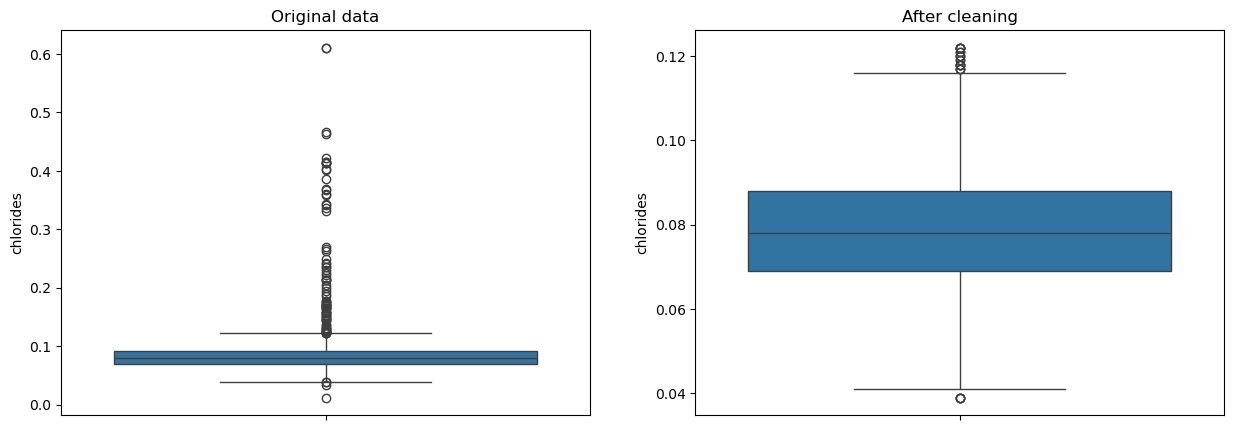

In [46]:
# Se the difference in boxplots before and after
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5), sharey=False)

# Original data
sbn.boxplot(ax = axes[0], y=dfredwine['chlorides'])
axes[0].set_title("Original data")

# Without outliers data
sbn.boxplot(ax = axes[1], y=dfredwine_clean['chlorides'])
axes[1].set_title("After cleaning")

Text(0.5, 1.0, 'After cleaning')

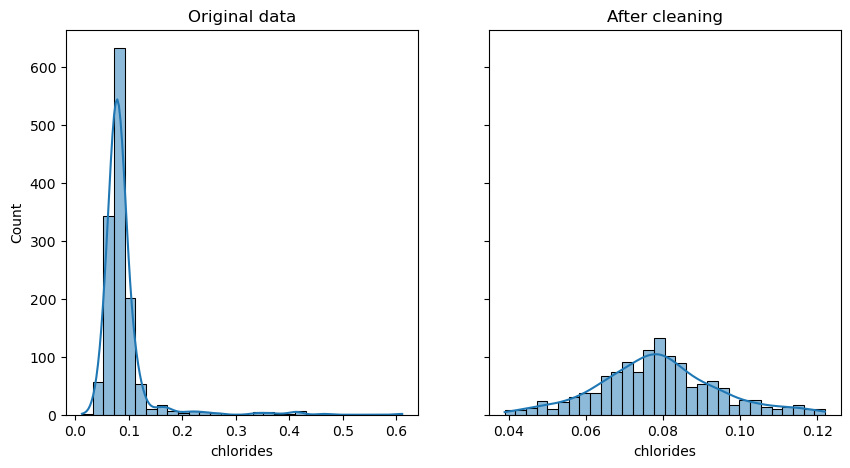

In [47]:
# Checking the normal distribution before and after chlorides is cleaned for outliers
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), sharey=True)

# Original data
sbn.histplot(x=dfredwine['chlorides'], ax = axes[0], kde=True, bins = 30)
axes[0].set_title("Original data")

# Without outliers data
sbn.histplot(x = dfredwine_clean['chlorides'], ax = axes[1], kde=True, bins = 30)
axes[1].set_title("After cleaning")

By removing the red wines with a large amount of chloride, we get at much more normally distribution

In [48]:
# Cleaning the remaing choosen attributes
for column in ['residual sugar', 'sulphates']:
    dfredwine_clean = remove_outliers(dfredwine_clean, column, 1.5)

In [49]:

dfskewed2 = pd.DataFrame({
    'Red Wine Original': dfredwine.skew(numeric_only=True),
    'Red Wine Clean': dfredwine_clean.skew(numeric_only=True)
})

dfskewed2.style.background_gradient(cmap='Reds')

,Red Wine Original,Red Wine Clean
fixed acidity,0.941041,0.852792
volatile acidity,0.729279,0.626706
citric acid,0.312726,0.312486
residual sugar,4.548153,0.545688
chlorides,5.502487,0.178674
free sulfur dioxide,1.226579,1.035418
total sulfur dioxide,1.540368,1.228365
density,0.044778,-0.133671
pH,0.232032,0.338963
sulphates,2.406505,0.543302


We can see that the skewness have dropped significantly and thereby made the distribution more normal

In [50]:
# Comparison of values for red wine
columns = ['chlorides', 'residual sugar', 'sulphates']

pd.DataFrame({
    'Original Mean': dfredwine[columns].mean(),
    'Cleaned Mean': dfredwine_clean[columns].mean(),
    'Original Std': dfredwine[columns].std(),
    'Cleaned Std': dfredwine_clean[columns].std(),
    'Original Skew': dfredwine[columns].skew(),
    'Cleaned Skew': dfredwine_clean[columns].skew()
})

,Original Mean,Cleaned Mean,Original Std,Cleaned Std,Original Skew,Cleaned Skew
chlorides,0.088124,0.078112,0.049377,0.015130,5.502487,0.178674
residual sugar,2.523400,2.197193,1.352314,0.454798,4.548153,0.545688
sulphates,0.658705,0.629831,0.170667,0.113503,2.406505,0.543302


In [51]:
# Calculate number of rows removed
dfredwine.shape[0] - dfredwine_clean.shape[0]

237

##### Conclusion for removing outliers for red wine:
Removing the outliers have significantly dropped the skewness and standard deviation for 'chlorides', 'residual sugar' and 'sulphates', with only the sulphur levels bringing the skewness above 1

But removing all the outliers have significantly reduced the number of rows in our dataset (309), so it is worth to consider other options such as log-transformation


#### White wines

In [52]:
# Cleaning the choosen attributes for white wine
dfwhitewine_clean = dfwhitewine.copy()
for column in ['chlorides', 'volatile acidity', 'free sulfur dioxide', 'citric acid']:
    dfwhitewine_clean = remove_outliers(dfwhitewine_clean, column, 1.5)

In [53]:
# Comparison of values for white wine
columns = ['chlorides', 'volatile acidity', 'free sulfur dioxide', 'citric acid']

pd.DataFrame({
    'Original Mean': dfwhitewine[columns].mean(),
    'Cleaned Mean': dfwhitewine_clean[columns].mean(),
    'Original Std': dfwhitewine[columns].std(),
    'Cleaned Std': dfwhitewine_clean[columns].std(),
    'Original Skew': dfwhitewine[columns].skew(),
    'Cleaned Skew': dfwhitewine_clean[columns].skew()
})

,Original Mean,Cleaned Mean,Original Std,Cleaned Std,Original Skew,Cleaned Skew
chlorides,0.045905,0.041889,0.023103,0.009969,4.969076,0.118512
volatile acidity,0.280538,0.263766,0.103437,0.076469,1.641081,0.427798
free sulfur dioxide,34.889169,34.135135,17.210021,15.156916,1.566680,0.316516
citric acid,0.334332,0.325858,0.122446,0.083816,1.310601,0.354110


In [54]:
# Better display of the skewness before and after removing outliers
dfskewed3 = pd.DataFrame({
    'White Wine Original': dfwhitewine.skew(numeric_only=True),
    'White Wine Clean': dfwhitewine_clean.skew(numeric_only=True)
})

dfskewed3.style.background_gradient(cmap='Reds')

,White Wine Original,White Wine Clean
fixed acidity,0.696100,0.735075
volatile acidity,1.641081,0.427798
citric acid,1.310601,0.354110
residual sugar,1.333639,0.960428
chlorides,4.969076,0.118512
free sulfur dioxide,1.566680,0.316516
total sulfur dioxide,0.456800,0.352240
density,1.273318,0.420896
pH,0.455457,0.441884
sulphates,0.937853,0.910065


##### Conclusion for removing outliers for white wine:
Removing the outliers have significantly dropped the skewness and standard deviation for 'chlorides', 'volatile acidity', 'free sulfur dioxide' and 'citric acid', and have redcued all skew-levels to below 1

In [55]:
# But removing all the outliers have significantly reduced the number of rows in our dataset (557), so it is worth to consider other options such as log-transformation
dfwhitewine.shape[0] - dfwhitewine_clean.shape[0]

557

#### All wines

In [56]:
# Aggregate the two cleaned dataframes
dfwine_clean = pd.concat([dfredwine_clean, dfwhitewine_clean])

In [57]:
# Better display of the skewness before and after removing outliers
dfskewed4 = pd.DataFrame({
    'Original': dfwine.skew(numeric_only=True),
    'Clean': dfwine_clean.skew(numeric_only=True)
})

dfskewed4.style.background_gradient(cmap='Reds')

,Original,Clean
fixed acidity,1.650417,1.577352
volatile acidity,1.504557,1.652320
citric acid,0.484309,-0.249757
residual sugar,1.706550,1.375399
chlorides,5.338237,1.005499
free sulfur dioxide,1.362719,0.445243
total sulfur dioxide,0.063614,-0.004373
density,0.666326,0.063236
pH,0.389969,0.390960
sulphates,1.809454,0.691734


#### Conclusion for removing outliers for all wines:
We can see that there has been a significant drop in the skewness for all attributes, though the acidity levels are still quite skewed and it should be considered using log transformation on the acidity levels.

### Differences between red and white wine

#### Which type of wine has higher average quality, how big is the difference?

Text(0.5, 1.0, 'White')

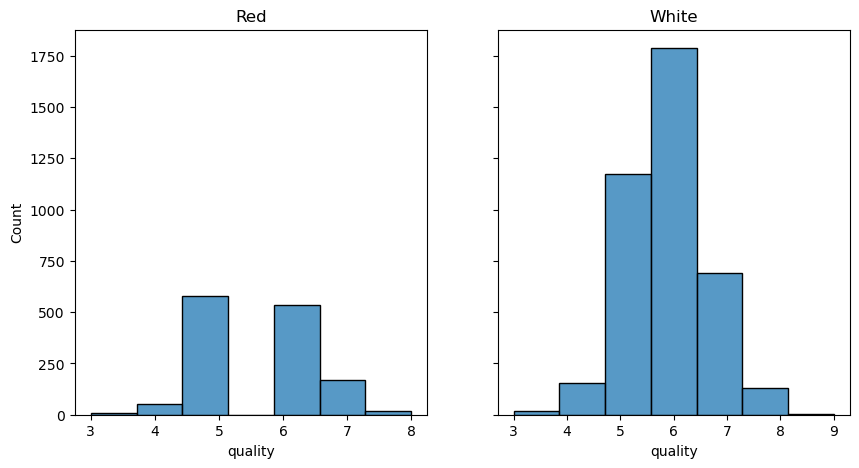

In [58]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5), sharey=True)

# Red wine
sbn.histplot(x=dfredwine['quality'], ax = axes[0], bins = 7)
axes[0].set_title("Red")

# White wine
sbn.histplot(x=dfwhitewine['quality'], ax = axes[1], bins = 7)
axes[1].set_title("White")



Text(0.5, 1.0, 'Average quality for red and white wines')

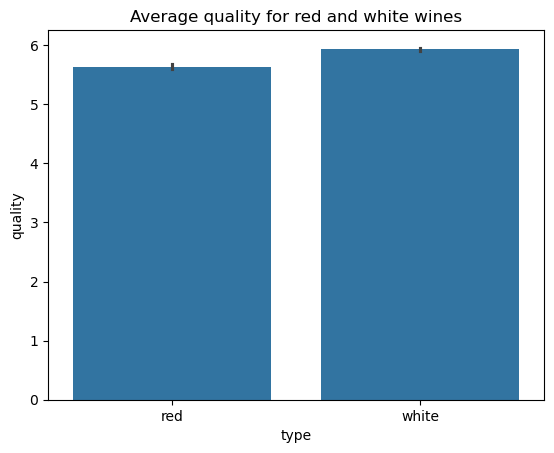

In [59]:
sbn.barplot(x='type', y='quality', data=dfwine_clean)
plt.title("Average quality for red and white wines")

As seen in the boxplot, the white wine has a higher meadian for the quality, while we in the histogram can see how the different wines are distributed in quality.

In [60]:
# Mean for red wine:
mean_redwine = dfredwine_clean['quality'].mean()

# Mean for white wine:
mean_whitewine = dfwhitewine_clean['quality'].mean()

difference = mean_whitewine - mean_redwine

print(f"Average quality for red wine: {mean_redwine}")
print(f"Average quality for white wine: {mean_whitewine}")
print(f"Difference: {difference}")

Average quality for red wine: 5.633689839572193
Average quality for white wine: 5.928319623971798
Difference: 0.2946297843996053


Above we can see that the white wine on average scores ca. 0.3 higher in quality

#### Which type of wine has higher average level of alcohol?

To see the difference visually we will make two histograms in the same graph:

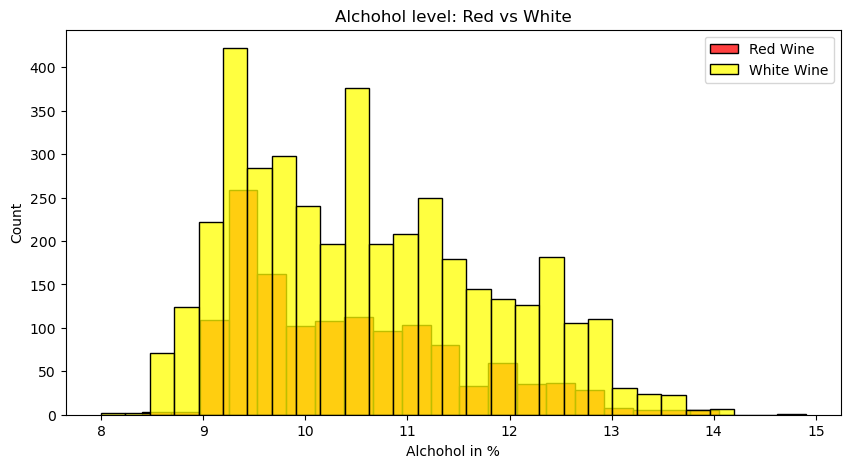

In [61]:
plt.figure(figsize=(10, 5))
sbn.histplot(dfredwine['alcohol'], color='red', label='Red Wine')
sbn.histplot(dfwhitewine['alcohol'], color='yellow', label='White Wine')
plt.title("Alchohol level: Red vs White")
plt.xlabel("Alchohol in %")
plt.legend()


Boxplot to see the average and mean for the alchohol %

Text(0, 0.5, 'Alchohol in %')

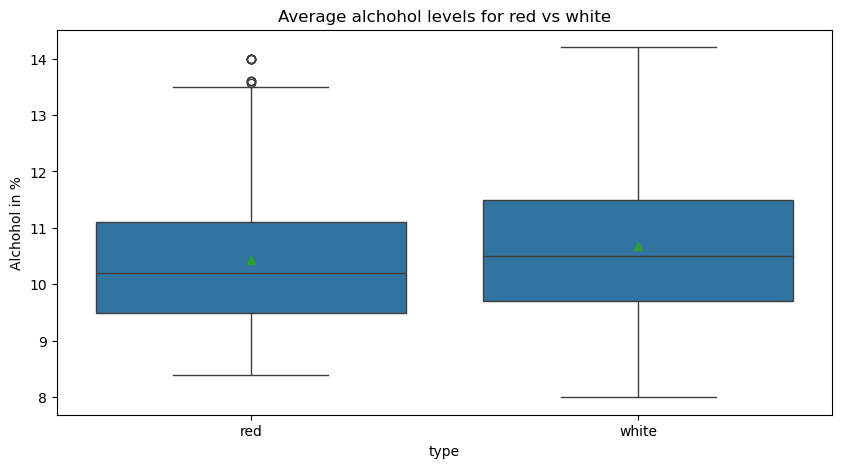

In [67]:
plt.figure(figsize=(10, 5))
sbn.boxplot(x='type', y='alcohol', data=dfwine_clean, showmeans=True)
plt.title("Average alchohol levels for red vs white")
plt.ylabel("Alchohol in %")

From the boxplot above, we can see that both the mean and the average for the white wine is higher than for the red wine.
We will now look at the specific numbers and calculate the difference.

In [68]:
# red wine average alcohol %:
alcohol_mean_red = dfredwine_clean['alcohol'].mean()

# white wine average alcohol %:
alcohol_mean_white = dfwhitewine_clean['alcohol'].mean()

# Diffrence
alcohol_difference = alcohol_mean_white - alcohol_mean_red

print(f"Average alcohol % for red wine: {alcohol_mean_red}")
print(f"Average alcohol % for white wine: {alcohol_mean_white}")
print(f"Difference in percentage point: {alcohol_difference}")

Average alcohol % for red wine: 10.430273321449793
Average alcohol % for white wine: 10.675185076380728
Difference in percentage point: 0.24491175493093564


We can now conclude that the white wine has higher average alcohol percentage than red wine 

#### Which one has higher average quantity of residual sugar? 

To best see the difference in residual sugar content, we will make a boxplot:

Text(0.5, 1.0, 'Residual suger in red vs white wine')

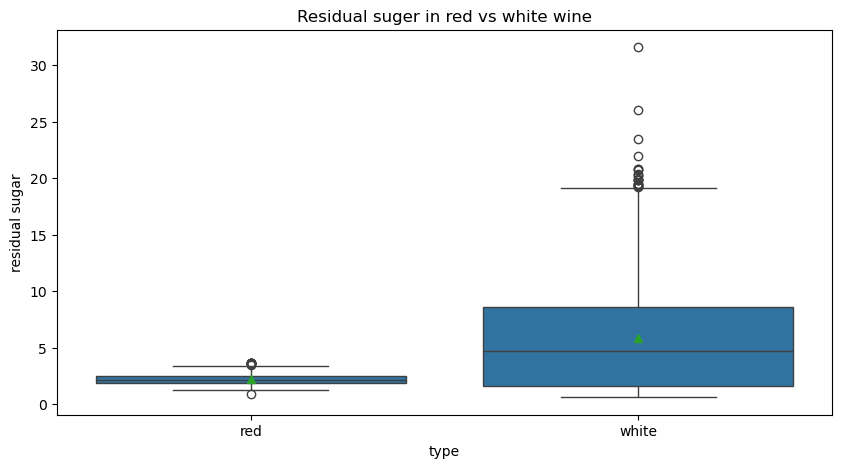

In [69]:
plt.figure(figsize=(10, 5))
sbn.boxplot(x = 'type', y = 'residual sugar', data = dfwine_clean, showmeans=True)
plt.title("Residual suger in red vs white wine")

From the boxplot above we can see that both the mean and the average is much higher in white wine than in red wine. We can also se that white wine has a much broader variaty of sugar levels.

Now we will look at the numbers and calculate the difference.

In [70]:
# red
mean_sugar_red = dfredwine_clean['residual sugar'].mean()

# white
mean_sugar_white = dfwhitewine_clean['residual sugar'].mean()

difference_sugar = mean_sugar_white - mean_sugar_red

print(f"White wine average sugar: {mean_sugar_white}")
print(f"Red wine average sugar: {mean_sugar_red}")
print(f"Difference: {difference_sugar}")

White wine average sugar: 5.806933019976498
Red wine average sugar: 2.197192513368984
Difference: 3.6097405066075137


From the numbers above we can conclude that white wine on average has a much higher amount of residual sugar than red wine

#### Do the quantity of alcohol and residual sugar influence the quality of the wine?

In [71]:
# Quick check to see where there are correlations
dfwine_clean[['alcohol', 'residual sugar', 'quality']].corr()

,alcohol,residual sugar,quality
alcohol,1.000000,-0.322761,0.466650
residual sugar,-0.322761,1.000000,-0.054497
quality,0.466650,-0.054497,1.000000


Pearson correlation to further investigate alcohol

In [72]:
r, p_value = stats.pearsonr(dfwine_clean['alcohol'], dfwine_clean['quality'])

print(f"Correlation (r): {r:}")
print(f"p_value: {p_value}")

Correlation (r): 0.46665049934759356
p_value: 1.3695177891091205e-243


From the numbers above, we can conclude the following using the pearson scale (-1 to 1):
* Residual sugar: Have no significant correlation with the quality of a wine
* Alcohol %: There is a significant positive correlation (0.47) between the alcohol percantage of a wine and the quality (higher alcohol % = higher quality). The very low p-value suggest that the result is staticticaly significant.

### pH values and bins

To see how the the wines are distributed among the pH values using different bin sizes

Text(0.5, 1.0, '10 bins')

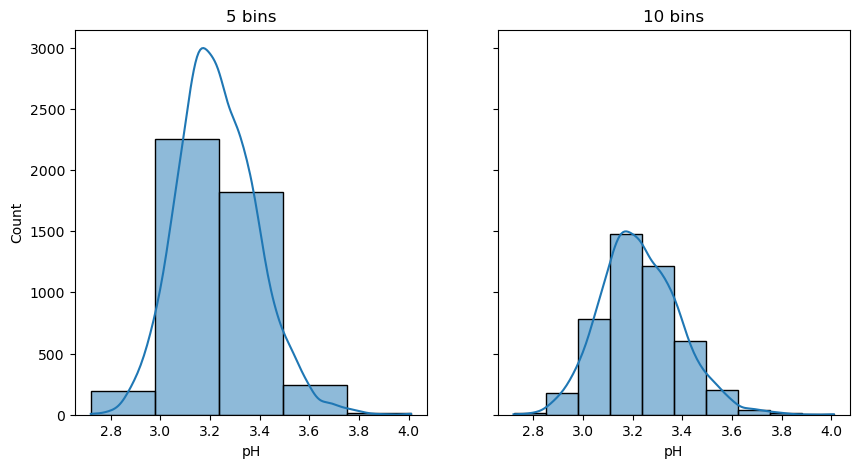

In [73]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), sharey = True)

# Plot with 5 bins
sbn.histplot(x=dfwine_clean['pH'], ax = axes[0], kde = True, bins = 5)
axes[0].set_title("5 bins")
           
# Plot with 10 bins
sbn.histplot(x=dfwine_clean['pH'], ax = axes[1], kde = True, bins = 10)
axes[1].set_title("10 bins")

Using more bins the subset with the peak changes and we can better see the outliers. With more bins we can also better see the true distribution of the data, and can see that the pH values follows a normal distribution.

In [74]:
bins5 = pd.cut(dfwine_clean['pH'], bins=5).value_counts()
bins10 = pd.cut(dfwine_clean['pH'], bins=10).value_counts()

print(f"Top subset with 5 bins: {bins5.head(1)}")
print(f"Top subset with 10 bins: {bins10.head(1)}")

Top subset with 5 bins: pH
(2.978, 3.236]    2257
Name: count, dtype: int64
Top subset with 10 bins: pH
(3.107, 3.236]    1473
Name: count, dtype: int64


In the histogram and in the calculated values above, we can see how using more bins gives us a more granualar and thereby a more accurate view of the pH values distribution

### Correlation

#### All wines combined

In [75]:
# Correlation matrix
cmat = dfwine_clean.corr(numeric_only=True)
cmat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.239226,0.329374,-0.135150,0.460148,-0.296326,-0.331546,0.463449,-0.260701,0.260272,-0.136787,-0.100375
volatile acidity,0.239226,1.000000,-0.450666,-0.212237,0.597712,-0.379383,-0.450482,0.319760,0.272641,0.241508,-0.070799,-0.236516
citric acid,0.329374,-0.450666,1.000000,0.109388,-0.157407,0.140997,0.208711,0.021464,-0.333616,0.001284,0.034392,0.119700
residual sugar,-0.135150,-0.212237,0.109388,1.000000,-0.181350,0.448561,0.505566,0.491035,-0.241438,-0.204148,-0.322761,-0.054497
chlorides,0.460148,0.597712,-0.157407,-0.181350,1.000000,-0.332631,-0.444428,0.591360,0.241836,0.392643,-0.345427,-0.268866
free sulfur dioxide,-0.296326,-0.379383,0.140997,0.448561,-0.332631,1.000000,0.732167,0.011042,-0.147609,-0.202682,-0.148724,0.099741
total sulfur dioxide,-0.331546,-0.450482,0.208711,0.505566,-0.444428,0.732167,1.000000,0.004664,-0.220051,-0.287490,-0.233902,-0.019785
density,0.463449,0.319760,0.021464,0.491035,0.591360,0.011042,0.004664,1.000000,0.079249,0.264127,-0.722764,-0.350280
pH,-0.260701,0.272641,-0.333616,-0.241438,0.241836,-0.147609,-0.220051,0.079249,1.000000,0.252373,0.046232,0.021843
sulphates,0.260272,0.241508,0.001284,-0.204148,0.392643,-0.202682,-0.287490,0.264127,0.252373,1.000000,-0.021590,0.051875


To get at better view of the correlations we will make a heatmap:

In [76]:
corr = dfwine_clean.corr(method='pearson', numeric_only=True)

<Axes: >

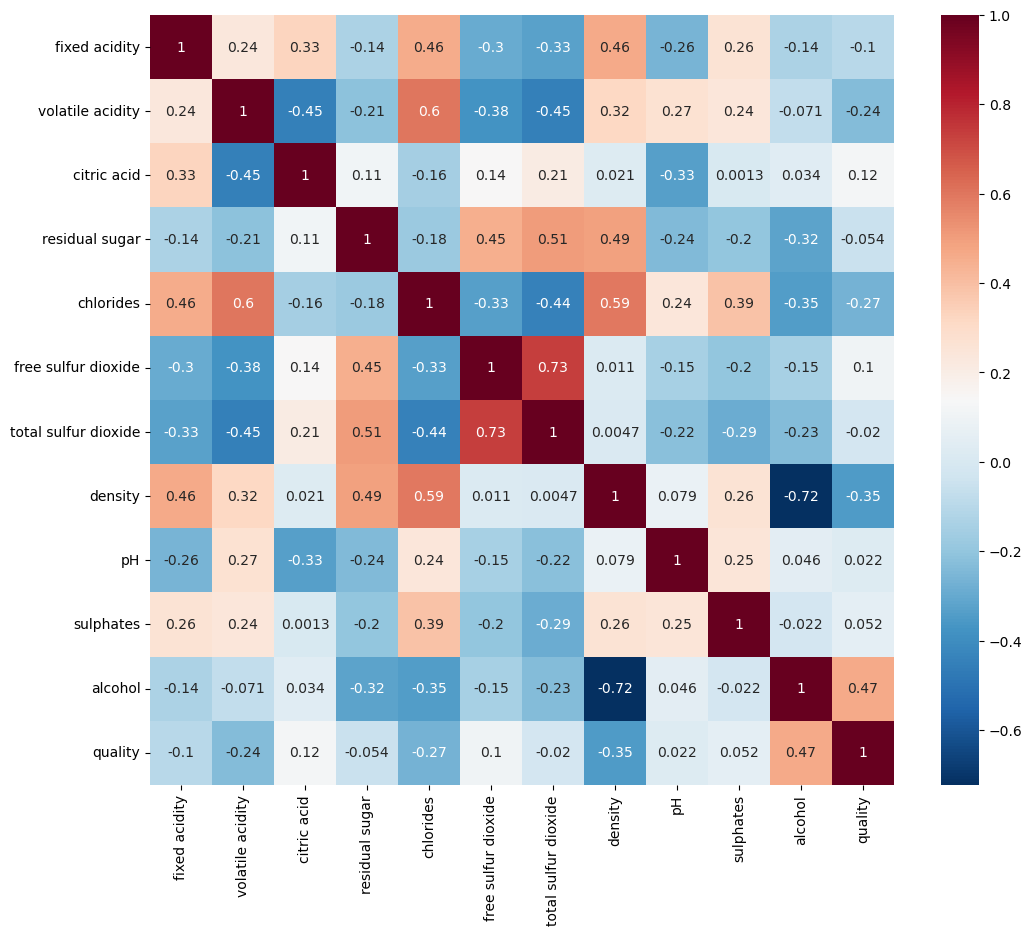

In [77]:
plt.figure(figsize=(12, 10))

# red = positive correlation og blue = negative correlation
sbn.heatmap(corr, annot=True, cmap='RdBu_r')

From the heatmap, we can see the following correlations for the dependent attribute 'quality':
* 'Alcohol', has the highest positive correlation
* 'Density', has the strongest negative correlation
* 'Total Sulfur Dioxide', has the lowest correlation

For the non dependent attributes, there are the following correlations:
* Free Sulfur Dioxide vs. Total Sulfur Dioxide (most positive)
* Density vs. Alcohol (strongest negative)

#### Removing non-correlated attributes

In [78]:
# We will remove the following with low correlation between -0,05 and 0,05 
# and non dependent attributes with strong correlations under -0,7 or over 0,7 :
columns_to_drop = ['total sulfur dioxide', 'pH', 'sulphates', 'density']

dfwine_clean2 = dfwine_clean.drop(columns=columns_to_drop)

### Normalisation and Scaling

We will scale the numeric values so that they have equal value.

In [80]:
# MinMax Scaling of the reaming numeric values
min_max_scaler = MinMaxScaler()
dfwine_clean_scaled = dfwine_clean2.copy()

# Columns we want to scale except our dependent attribute
numeric_cols = dfwine_clean2.select_dtypes(include=['float64', 'int64']).columns
cols_to_scale = numeric_cols.drop('quality')

#Scaling
dfwine_clean_scaled[cols_to_scale] = min_max_scaler.fit_transform(dfwine_clean2[cols_to_scale])


In [81]:
# Check the scaling
dfwine_clean_scaled.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,alcohol,quality,type
0,0.315315,0.496,0.000000,0.041935,0.574074,0.129870,0.225806,5,red
1,0.351351,0.640,0.000000,0.064516,0.777778,0.311688,0.290323,5,red
2,0.351351,0.544,0.053333,0.054839,0.722222,0.181818,0.290323,5,red


To visually see the effect of the scaling on outliers we will make a before and after boxplot:

Text(0.5, 1.0, 'Afer MinMax scaling')

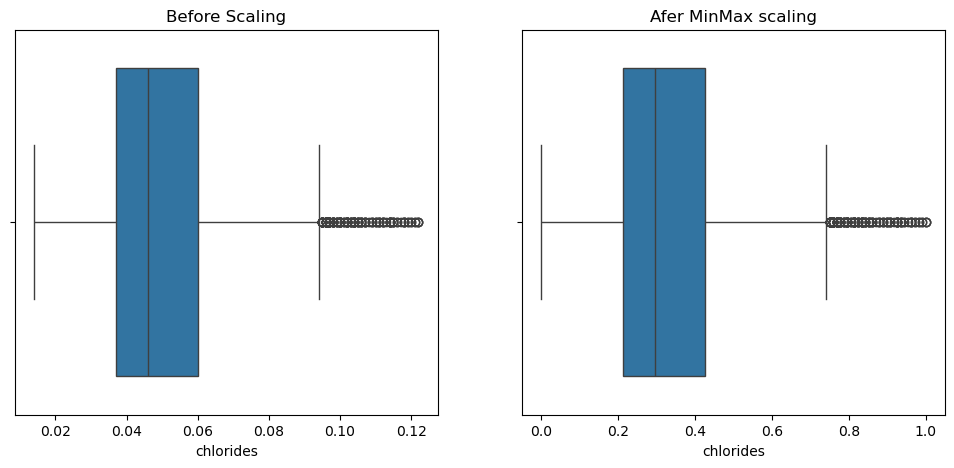

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before scaling
sbn.boxplot(x=dfwine_clean2['chlorides'], ax=axes[0])
axes[0].set_title(f"Before Scaling")

# After scaling
sbn.boxplot(x=dfwine_clean_scaled['chlorides'], ax=axes[1])
axes[1].set_title(f"Afer MinMax scaling")

We can see that the outliers now are all between 0 and 1, which means the lower chloride levels have all been pushed closer to 0, which is often the problem with the MinMaxScaler and extreme outliers. 
It should therefore be considered to use another scaler or re-evaluate the removal of outliers.

## Testing Hypotheses

In [97]:
# First we will determine when a wine goes from low to high quality
dfwine_clean_scaled['quality'].describe()

count    4526.000000
mean        5.855281
std         0.859938
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

We can see the median and the 75%-percentile is 6, so too choose the "high quality" wines we will choose 7 as the boundry, so we do not pick the middle of the dataset.

In [98]:
# The wines are divided in low and high quality
high_quality = dfwine_clean_scaled[dfwine_clean_scaled['quality'] >= 7]['alcohol']
low_quality = dfwine_clean_scaled[dfwine_clean_scaled['quality'] < 7]['alcohol']

t_stat, p_value = stats.ttest_ind(high_quality, low_quality)

print(f"t_value: {t_stat}")
print(f"p_value: {p_value}")

t_value: 30.35899675168641
p_value: 2.012274343498631e-184


Given the very low p value and very high t value, we can conclude that there is a very high statistical significance and we wille therefore reject the null-hypotheses and embrace the alternative: ($H_a$): A higher alcohol % equals a higher average quality for a wine 

## Conclusion

Points of interest for the consumers, distributers and the producers
* Consumers: A consumer would want to know how to spot a high quality wine, by reading the nutrion labels. Fx. does the alcohol% matter, does the sugar matter, how about sulphates?
* Distributers: They'd might like to know how they can price the wine, by looking at the nutrion labels. Maybe some of their customers, prefer wines with more sugar or less sugar, so knowing that, they can better focus their sales to different markets
* Producers: Knowning which ingredients matters in terms of quality, gives the producers a better understanding of how to make the wine and when to harvest the grapes.

The most important conclusions about wine:
* Alcohol plays a very important part of a wines quality, the higher % the better quality
* Density has the highest negative correlation, which makes sense given that alcohol has a lower densisty than water, so the more alcohol the lighter the wine gets and therefore a high density implies a low alcohol %